# SIECI NEURONOWE – ćwiczenie 1
Celem ćwiczenia jest wprowadzenie/przypomnienie narzędzi i zapoznanie się z
danymi z których będziemy korzystać w dalszej części kursu do ewaluacji sieci
neuronowych jako metody uczenia maszynowego.
W tym i kolejnych ćwiczeniach – 2 i 3 - dozwolone jest korzystanie z dowolnych
bibliotek do operowania na danych (wczytywanie, analiza eksploracyjna,
preprocessing), uzyskania metryk jakości modelu i wydajnych obliczeń macierzowych.
(Metody uczenia trzeba będzie jednak zaimplementować samodzielnie!) Sugerowana,
prosta w użyciu konfiguracja to:

- Python
- Pandas do przeglądania danych
- Numpy do obliczeń na macierzach
- Scikit-learn do wyliczenia metryk jakości

Na pierwszych zajęciach masz czas na zapoznanie się z odpowiednimi bibliotekami/
przypomnienie sobie ich z poprzedniego semestru. Następnie, wczytaj i przeanalizuj
zbiór danych Heart Disease:

https://archive.ics.uci.edu/dataset/45/heart+disease

Analiza eksploracyjna powinna obejmować odpowiedzi na pytania:

- Czy zbiór jest zbalansowany pod względem liczby próbek na klasy?
- Jakie są średnie i odchylenia cech liczbowych?
- Dla cech liczbowych: czy ich rozkład jest w przybliżeniu normalny?
- Dla cech kategorycznych: czy rozkład jest w przybliżeniu równomierny?
- Czy występują cechy brakujące i jaką strategię możemy zastosować żeby je zastąpić?

W wyniku pracy do przyszłego tygodnia powinna powstać pierwsza część
sumarycznego raportu który obejmować będzie ćwiczenia 1-4 oraz kod
przekształcający dane do macierzy cech liczbowych (przykłady × cechy).

Ćwiczenie oceniane jest w skali 0-10 pkt.

## Ładowanie Danych

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = pd.read_csv('../heart-disease/processed.cleveland.data', header=None, names=column_names, encoding='latin1')

print(data.head())
print(data.info())



    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5 

## Ćwiczenie 1.
Czy zbiór jest zbalansowany pod względem liczby próbek na klasy?

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


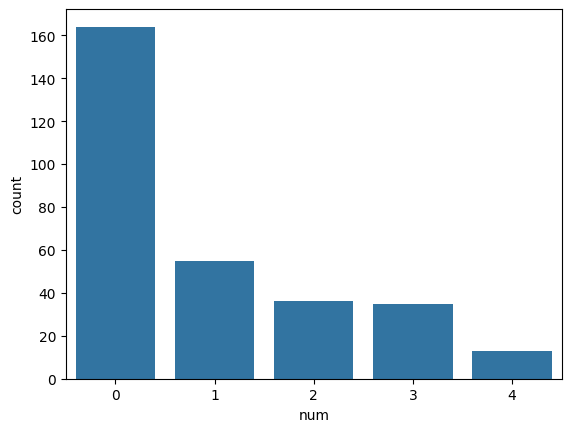

In [5]:
print(data['num'].value_counts())
sns.countplot(x='num', data=data)
plt.show()

<span style="color:green"> Jak możemy zaobserwować na wykresie, zbiór nie jest zrównoważony pod względem liczby próbek w poszczególnych klasach, ponieważ liczba próbek w klasie „0” jest znacznie większa niż w pozostałych klasach. Mimo to, inne klasy również są reprezentowane w zbiorze. 

<span style="color:green"> Ponieważ zmienna ta określa, czy ktoś ma chorobę serca, można ją również rozważać w ujęciu binarnym: „0” = osoba zdrowa, „inne” = osoba chora. W takim przypadku liczba próbek osób zdrowych i chorych byłaby w przybliżeniu podobna, co sprawia, że zbiór byłby bardziej zrównoważony pod względem klasyfikacji binarnej.

## Ćwiczenie 2.
Jakie są średnie i odchylenia cech liczbowych?


In [6]:
import pandas as pd
import numpy as np

data['ca'] = pd.to_numeric(data['ca'], errors='coerce')

numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

stats = data[numeric_columns].agg(['mean', 'std']).transpose()

stats = stats.rename(columns={'mean': 'Średnia', 'std': 'Odchylenie std'})
stats = stats.round(2)

print(stats)

          Średnia  Odchylenie std
age         54.44            9.04
trestbps   131.69           17.60
chol       246.69           51.78
thalach    149.61           22.88
oldpeak      1.04            1.16
ca           0.67            0.94


<span style="color:green">Średnie i odchylenia standardowe cech zostały zawarte w tabeli
<table>
  <tr>
    <td>Nazwa cechy</td>
    <td>Średnia</td>
    <td>Odch std</td>
  </tr>
  <tr>
    <td><span style="color:green">age</span></td>
    <td><span style="color:green">54.44</span></td>
    <td><span style="color:green">9.04</span></td>
  </tr>
  <tr>
    <td><span style="color:green">trestbps</span></td>
    <td><span style="color:green">131.69</span></td>
    <td><span style="color:green">17.60</span></td>
  </tr>
  <tr>
    <td><span style="color:green">chol</span></td>
    <td><span style="color:green">246.69</span></td>
    <td><span style="color:green">51.78</span></td>
  </tr>
  <tr>
    <td><span style="color:green">thalach</span></td>
    <td><span style="color:green">149.61</span></td>
    <td><span style="color:green">22.88</span></td>
  </tr>
  <tr>
    <td><span style="color:green">oldpeak</span></td>
    <td><span style="color:green">1.04</span></td>
    <td><span style="color:green">1.16</span></td>
  </tr>
  <tr>
    <td><span style="color:green">ca</span></td>
    <td><span style="color:green">0.67</span></td>
    <td><span style="color:green">0.94</span></td>
  </tr>
</table>


## Ćwiczenie 3
Dla cech liczbowych: czy ich rozkład jest w przybliżeniu normalny?


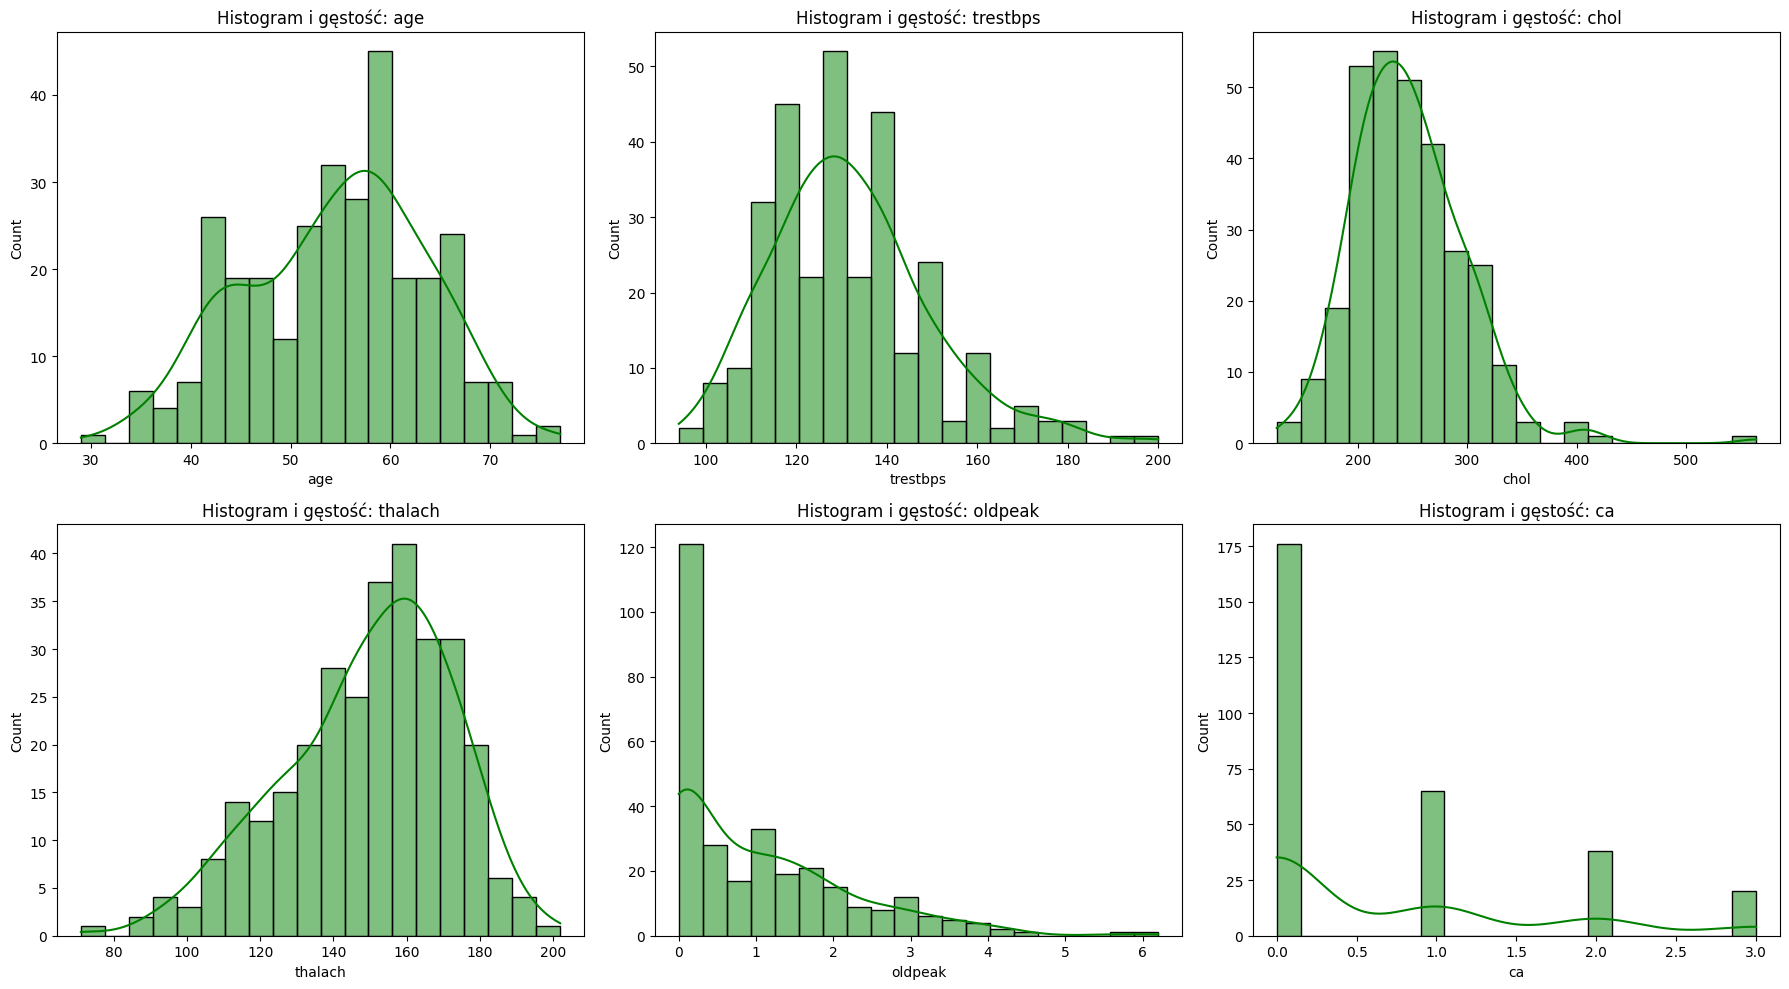

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], kde=True, ax=axes[i], color='green', bins=20)
    axes[i].set_title(f'Histogram i gęstość: {col}')

plt.tight_layout()
plt.show()

<span style="color:green"> Na podstawie wykresów wydaje się, ze blisko rozkładu normalnego mogą być tylko TRESTBPS, CHOL, THALACH. 

<span style="color:green"> Inne zmienne nie wydają się być nawet blisko uzyskania, ale sprobójmy to wyliczyć

In [8]:
from scipy.stats import shapiro

for col in numeric_columns:
    stat, p = shapiro(data[col].dropna())
    print(f"{col}: p={p:.4f}")

age: p=0.0061
trestbps: p=0.0000
chol: p=0.0000
thalach: p=0.0001
oldpeak: p=0.0000
ca: p=0.0000


<span style="color:green"> Wykonaliśmy tutaj próbę Shapiro, która pokazała nam, ze mozemy wykluczyc rozklad normalny dla wszyskich cech numerycznych, gdyz zawsze p < 0.05

## Ćwiczenie 4
Dla cech kategorycznych: czy rozkład jest w przybliżeniu równomierny?

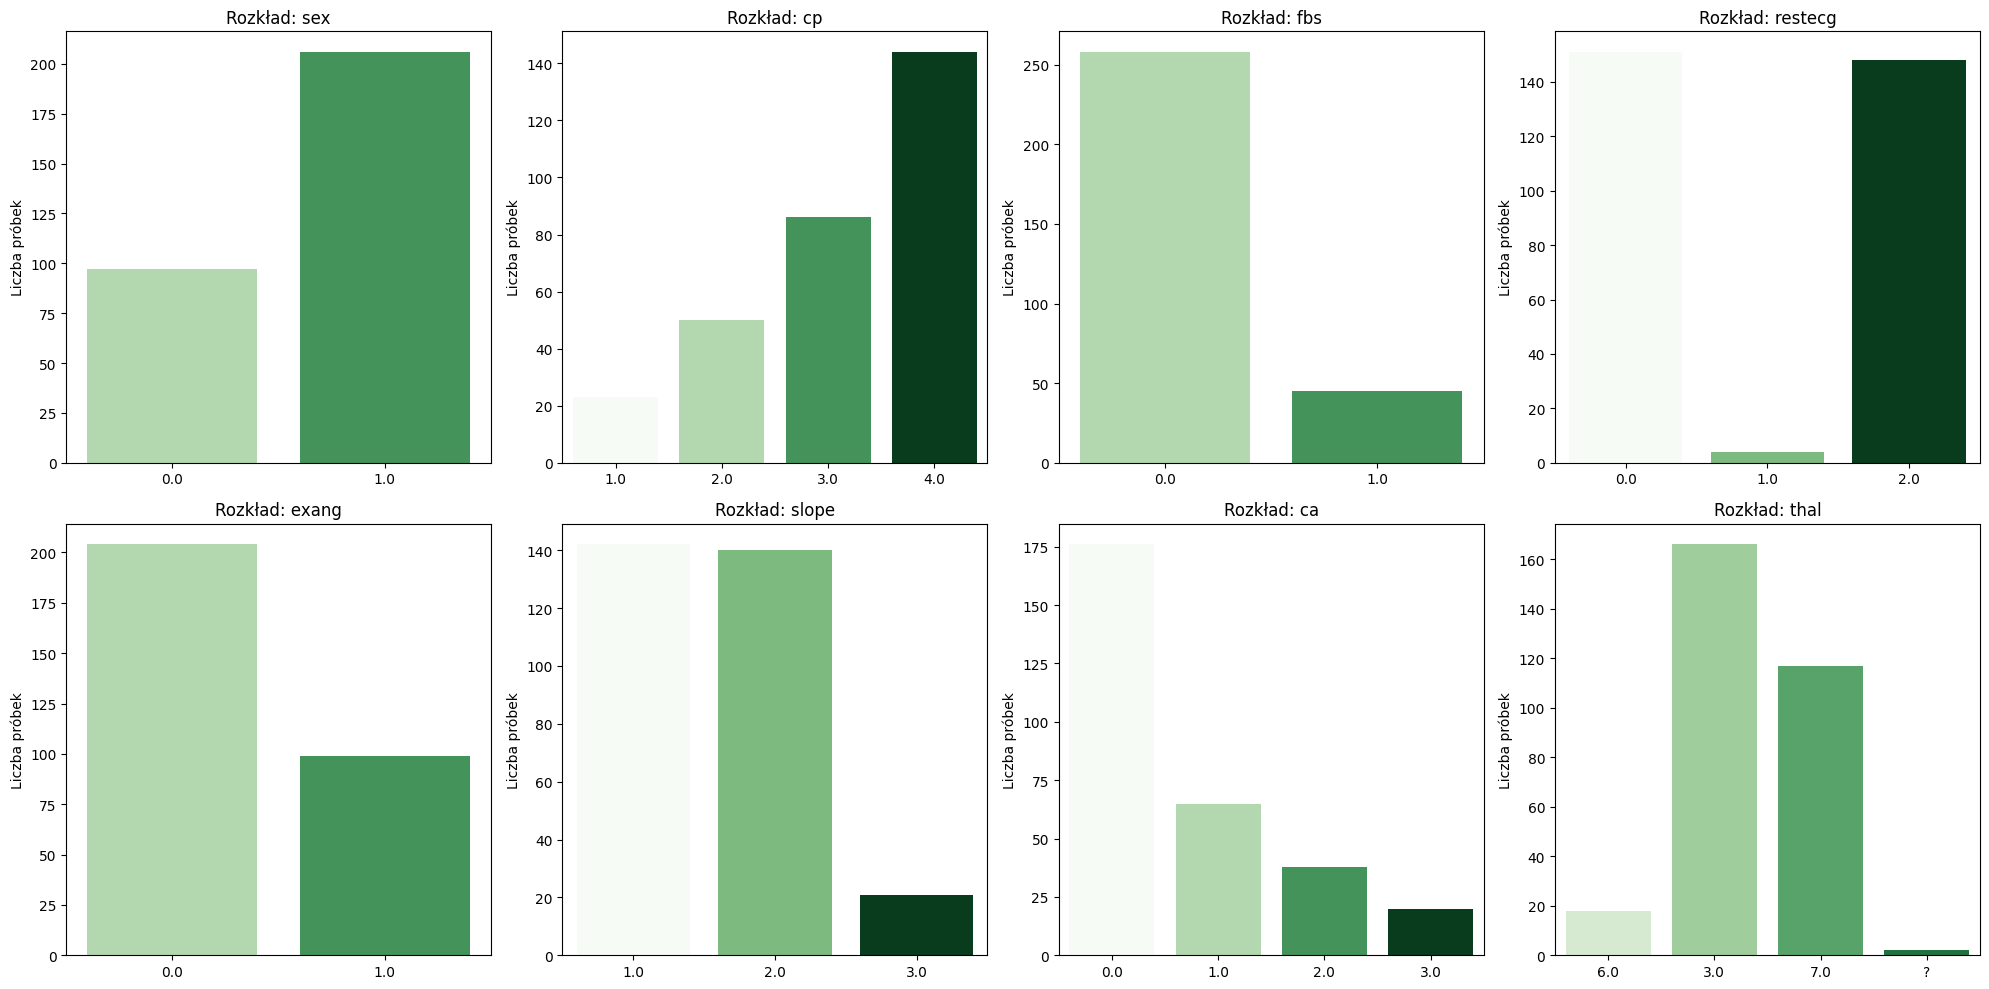

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=data, ax=axes[i], hue=col, palette="Greens", legend=False)
    axes[i].set_title(f'Rozkład: {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Liczba próbek')

plt.tight_layout()
plt.show()

<span style="color:green"> Jak można zauważyć na wykresach, większość zmiennych kategoryczynych nie ma rozkładu równomiernego. Przejdźmy sobie przez nie pokolei:

<span style="color:green"> SEX -> dwukrotnie więcej męzczyzn niz kobiet, brak rozkładu równomiernego

<span style="color:green"> CP -> kat. 3 i 4 znacznie częstsze, bardzo mało kat. 1, brak rozkładu równomiernego

<span style="color:green"> FBS -> kilkukrotnie więcej kat. 0 niz 1, brak rozkładu równomiernego

<span style="color:green"> RESTECG -> praktyczny brak kat. 1, ale rozlozone rownomiernie pomiedzy 0 i 2, brak rozkładu równomiernego

<span style="color:green"> EXANG -> dwukrotna przewaga kat. 0 nad 1, brak rozkładu równomiernego

<span style="color:green"> SLOPE -> bardzo mała liczba kat. 3, brak rozkładu równomiernego

<span style="color:green"> CA -> duza przewaga kat. 0, brak rozkładu równomiernego

<span style="color:green"> THAL -> znacznie mniej kat. 6, brak rozkładu równomiernego

# Czy występują cechy brakujące i jaką strategię możemy zastosować żeby je zastąpić?


<span style="color:green">  Sformuowanie "cechy brakujące" odnosi się do sytuacji, gdy w zbiorze danych nie ma wartości dla niektórych zmiennych w określonych obserwacjach np. brakuje wieku dla danego rekordu lub innej cechy. Jest to zla sytuacja, poniewaz cos musimy z tym faktem zrobic, aby moc poprawnie operowac na danych, bo moze nam to przeszkadzac w uczeniu maszynowym i obliczeniach np. sredniej. 

<span style="color:green">  Co mozemy zrobić?

<span style="color:green">  Usuwamy całe wiersze, które mają brakujące wartości, uzupełniamy dane np. średnią, medianą, wartością najczęstszą (nalezy uwazać z iloscia zastapianych danych), lub uzyc algorytmow zastepujacych dane.

# Przekształcenie danych do macierzy cech liczbowych (przykłady × cechy).

In [10]:
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

numeric_data = data[numeric_columns].dropna()

feature_matrix = numeric_data.to_numpy()

print("Macierz cech liczbowych:")
print(feature_matrix)

Macierz cech liczbowych:
[[ 63.  145.  233.  150.    2.3   0. ]
 [ 67.  160.  286.  108.    1.5   3. ]
 [ 67.  120.  229.  129.    2.6   2. ]
 ...
 [ 68.  144.  193.  141.    3.4   2. ]
 [ 57.  130.  131.  115.    1.2   1. ]
 [ 57.  130.  236.  174.    0.    1. ]]
